# why using sin and cos for positional encoding?

In [32]:
import torch
import matplotlib.pyplot as plt
from math import sin, cos
from typing import List

In [33]:
class PositionalEncoder:
    def __init__(self, sequence_len: int, hidden_size: int):
        self.sequence_len = sequence_len
        self.hidden_size = hidden_size

    def exponent(self, hidden_id: int) -> float:
        return (2 * hidden_id) / self.hidden_size

    def encode_entry(self, position_id: int, hidden_id: int) -> float:
        exponent = self.exponent(hidden_id=hidden_id)
        frac = position_id / (10_000 ** exponent)
        if hidden_id % 2 == 0:
            return sin(frac)
        return cos(frac)

    def encode_sequence(self) -> torch.Tensor:
        sequence_encoding = torch.zeros(size=[self.sequence_len, self.hidden_size])
        for position_id in range(self.sequence_len):
            for hidden_id in range(self.hidden_size):
                sequence_encoding[position_id, hidden_id] = self.encode_entry(position_id=position_id,
                                                                               hidden_id=hidden_id)
        return sequence_encoding

In [36]:
pos_encoder = PositionalEncoder(sequence_len=64, hidden_size=100)
seq_encoding = pos_encoder.encode_sequence()

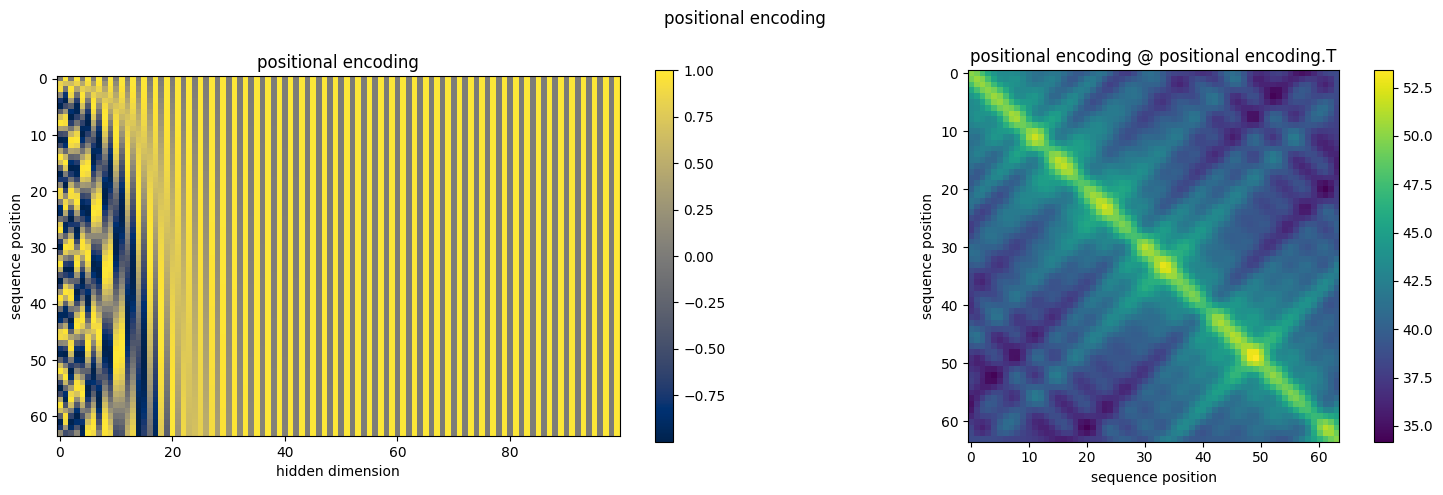

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
im1 = axs[0].imshow(seq_encoding, cmap="cividis")
axs[0].set_title("positional encoding")
axs[0].set_xlabel("hidden dimension")
axs[0].set_ylabel("sequence position")
fig.colorbar(ax=axs[0], mappable=im1)

im2 = axs[1].imshow(seq_encoding @ seq_encoding.T, cmap="viridis")
axs[1].set_title("positional encoding @ positional encoding.T")
axs[1].set_xlabel("sequence position")
axs[1].set_ylabel("sequence position")
fig.colorbar(ax=axs[1], mappable=im2)

fig.suptitle("positional encoding")
plt.tight_layout()
plt.show()

- (left) every sequence position has its own unique spatial encoding
- (left) the spatial encoding remains constant thorughout the learning process, so the model can deduct information from it
- (left) $sin(a), cos(a) \in [-1,1]$ so the sum of all entries of the encoding of one position is bound to be smaller than the hidden size of the attention block
- (right) most highest values are along the main diagonal. It contains the dot product similarities $pe_i^Tpe_i$
    - $\Rightarrow$ dot product similarity $(x_i+pe_i)^T(x_i+pe_i)$ is biased to lead to a high value
    - $\Rightarrow$ the attention scores from positions $i$ to themselves are biased to be bigger
    - $\Rightarrow$ recontextualization of word embedding $i$ is biased to focus more on itself, so the mixing doesn't lead to too strong information mixing (can be especially useful in early training iterations)
- (right) the more spatial distance is between two positions, the (in general) smaller is the dot product similarity
    - $\Rightarrow$ the more distance is between the positions, the higher is the model biased to have pay less attention to their combination